# Seaborn Part 2: Intermediate Plots

This notebook explores the rich variety of statistical plots that Seaborn offers. We'll cover plots for visualizing distributions, categories, relationships, and matrices of data.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load built-in datasets for examples
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")

## Categorical Plots

These plots show the relationship between a numerical and one or more categorical variables.

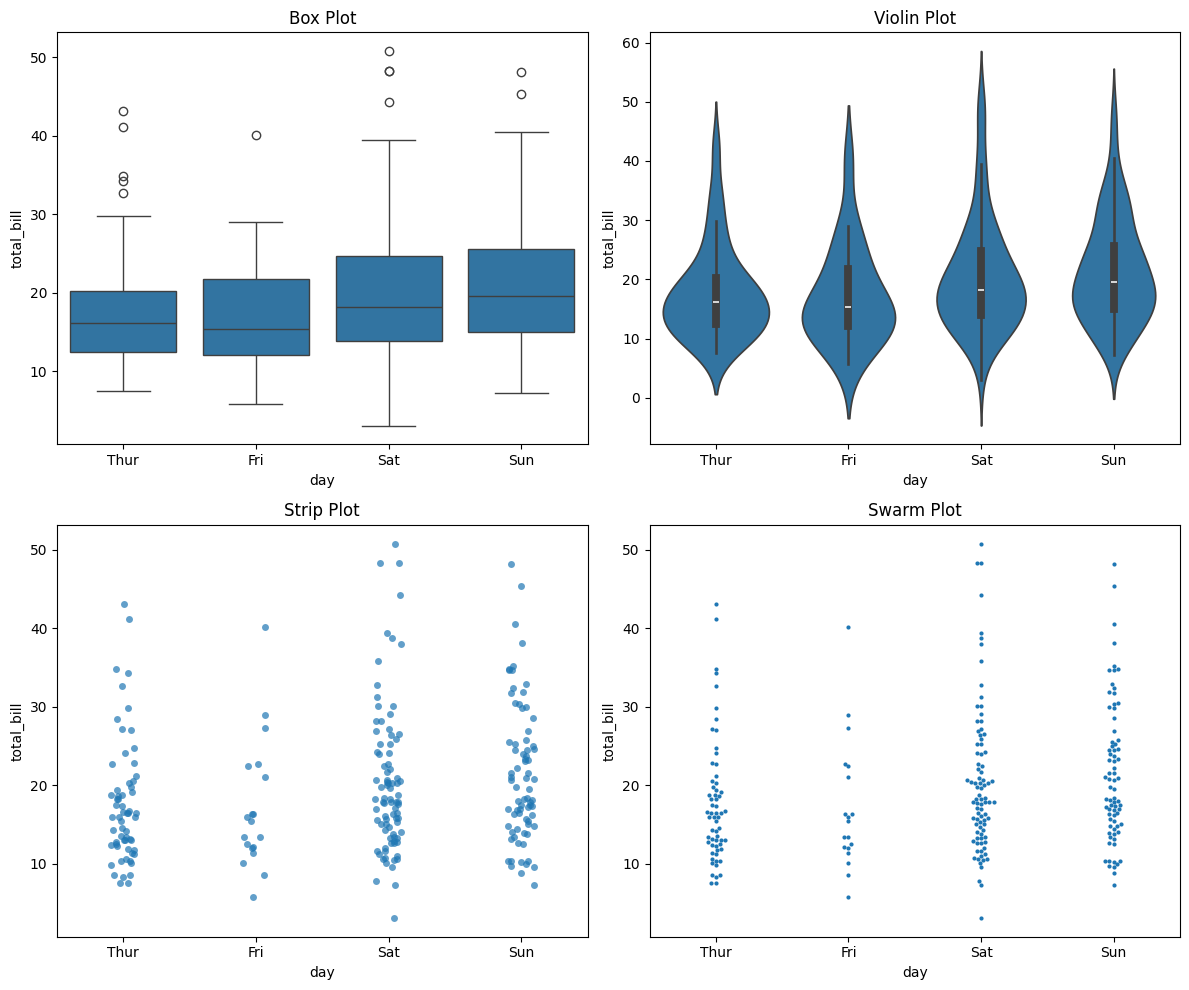

In [2]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

sns.boxplot(data=tips, x="day", y="total_bill", ax=axs[0, 0])
axs[0, 0].set_title('Box Plot')

sns.violinplot(data=tips, x="day", y="total_bill", ax=axs[0, 1])
axs[0, 1].set_title('Violin Plot')

sns.stripplot(data=tips, x="day", y="total_bill", ax=axs[1, 0], jitter=True, alpha=0.7)
axs[1, 0].set_title('Strip Plot')

sns.swarmplot(data=tips, x="day", y="total_bill", ax=axs[1, 1], size=3)
axs[1, 1].set_title('Swarm Plot')

plt.tight_layout()
plt.show()

## Distribution Plots

These plots are used to visualize the distribution of a single variable.

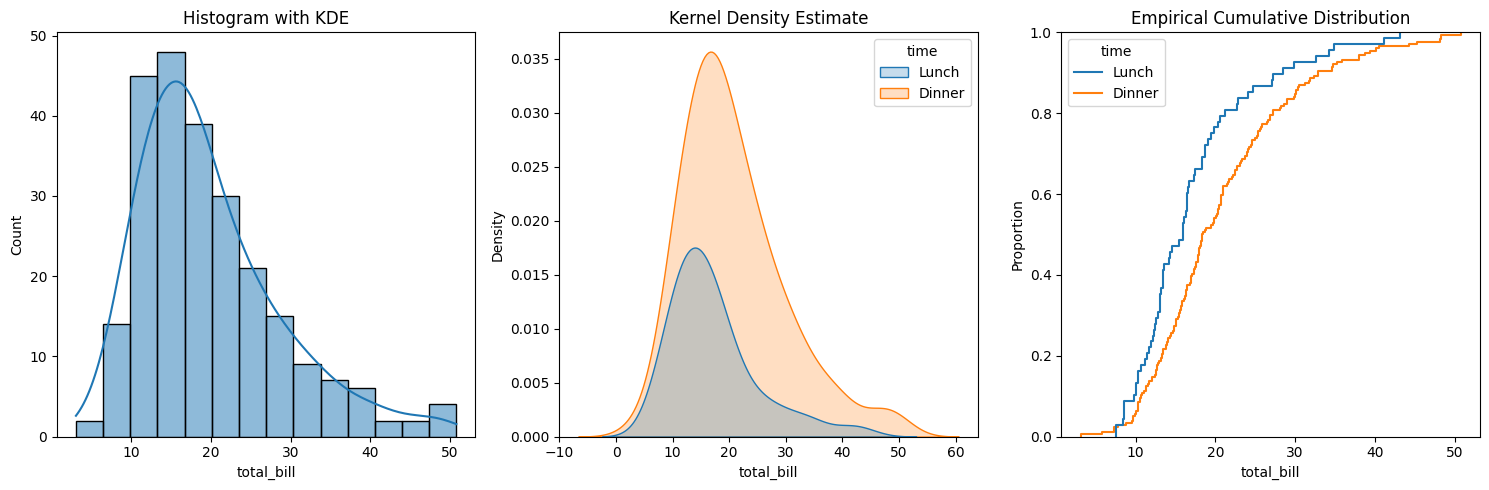

In [3]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(data=tips, x="total_bill", kde=True, ax=axs[0])
axs[0].set_title('Histogram with KDE')

sns.kdeplot(data=tips, x="total_bill", hue="time", fill=True, ax=axs[1])
axs[1].set_title('Kernel Density Estimate')

sns.ecdfplot(data=tips, x="total_bill", hue="time", ax=axs[2])
axs[2].set_title('Empirical Cumulative Distribution')

plt.tight_layout()
plt.show()

## Relational Plots (`relplot`)

`relplot` is a figure-level function for visualizing statistical relationships. It can create subplots based on categorical variables.

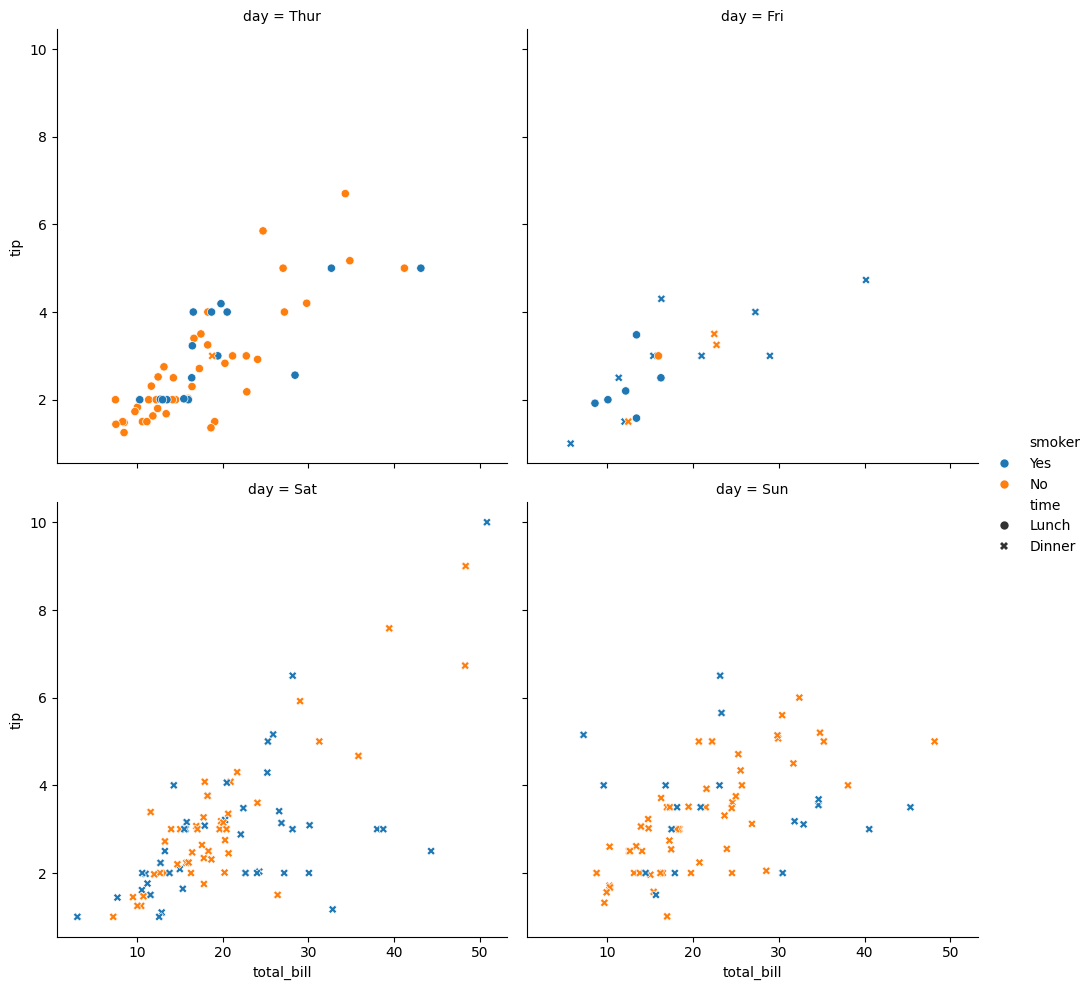

In [4]:
sns.relplot(data=tips, x="total_bill", y="tip", hue="smoker", style="time", col="day", col_wrap=2)
plt.show()

## Regression Plots

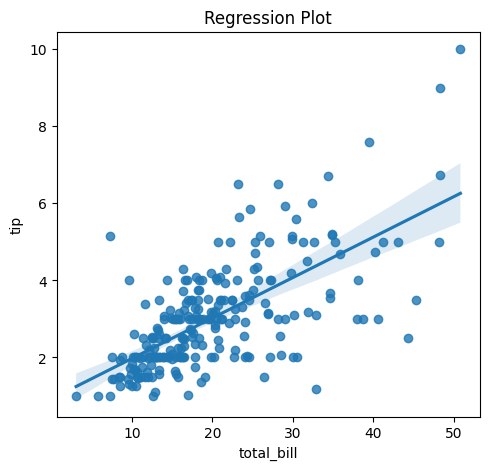

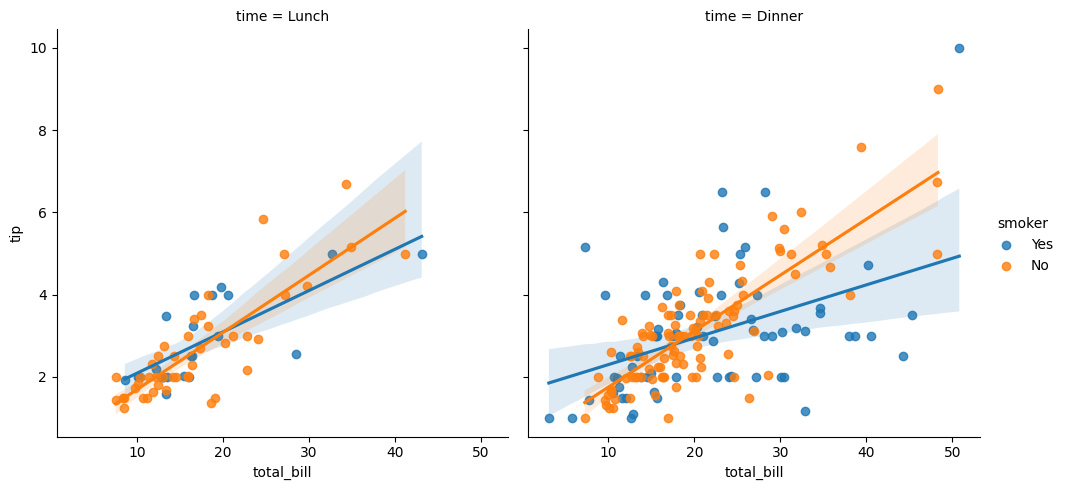

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# `regplot` is an axes-level function
sns.regplot(data=tips, x="total_bill", y="tip", ax=axs[0])
axs[0].set_title('Regression Plot')

# `lmplot` is a figure-level function that combines regplot with FacetGrid
# We can't plot it on an existing axes, so we'll just show the regplot here.
axs[1].set_visible(False)
plt.show()

# Example of lmplot
sns.lmplot(data=tips, x="total_bill", y="tip", hue="smoker", col="time")
plt.show()

## Pair Plots (`pairplot`)

`pairplot` creates a grid of scatterplots for each pair of variables in a dataset and histograms or KDE plots on the diagonal.

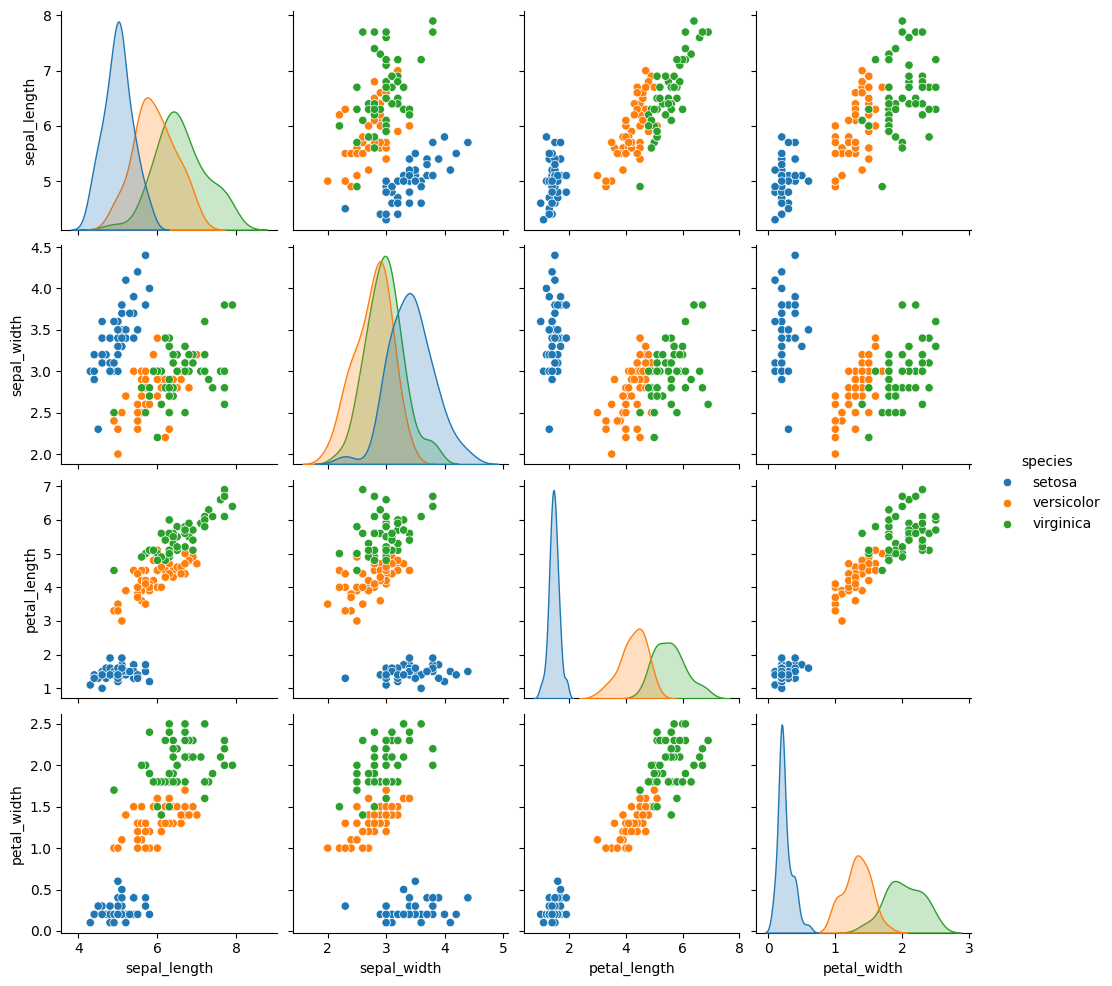

In [6]:
sns.pairplot(data=iris, hue="species")
plt.show()

## Heatmaps

A heatmap is a graphical representation of data where the individual values contained in a matrix are represented as colors.

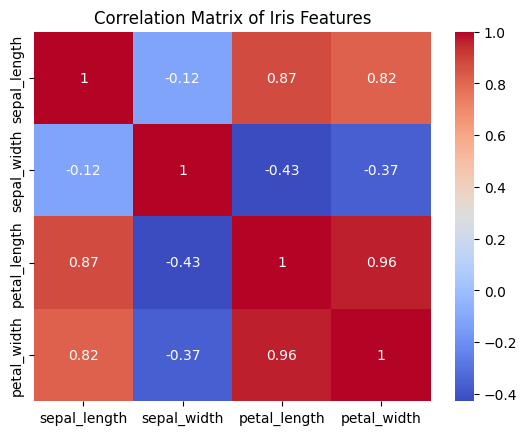

In [7]:
# Create a correlation matrix
iris_corr = iris.drop(columns='species').corr()

sns.heatmap(iris_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Iris Features')
plt.show()

## Customizing Plot Aesthetics (`hue`, `size`, `style`)

Many Seaborn functions use these parameters to add more dimensions to a plot:
- `hue`: Assigns different colors to data points based on a categorical variable.
- `size`: Changes the size of markers based on a numeric variable.
- `style`: Changes the marker style based on a categorical variable.

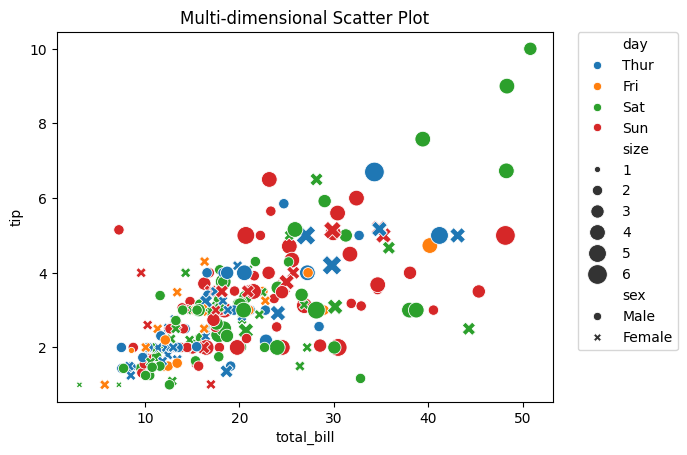

In [8]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="day", size="size", style="sex", sizes=(20, 200))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Multi-dimensional Scatter Plot')
plt.show()